In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from localcider.sequenceParameters import SequenceParameters
import seaborn as sns

In [2]:
import matplotlib 
import matplotlib.pyplot as plt
# For higher resoltion figures
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [3]:
FullOrthoDF = pd.read_pickle("../data/FullOrthologDF_20240930")

In [4]:
# add another column to sort the dataframe
tempCol,Xs =[],[]
for i, row in FullOrthoDF.iterrows():
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc]
    tempCol.append(temp)
    tempX =(np.arange(0,(row.SmoothedActivitesLoess.shape[0])))
    tempX = tempX-row.WxxLF_loc
    Xs.append(tempX)
FullOrthoDF['Activity_at_WxxLF']=tempCol
FullOrthoDF['CenteredXpos'] = Xs

tempCol,tempCol2,tempCol3 =[],[],[]
for i, row in FullOrthoDF.iterrows():
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc+20]
    tempCol.append(temp)
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc-20]
    tempCol2.append(temp)
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc-10]
    tempCol3.append(temp)
FullOrthoDF['Activity_at_WxxLF_plus20']=tempCol
FullOrthoDF['Activity_at_WxxLF_minus20']=tempCol2
FullOrthoDF['Activity_at_WxxLF_minus10']=tempCol3

tempCol =[]
plusX, minusX = 10,10
for i, row in FullOrthoDF.iterrows():
    start = max(0,row.WxxLF_loc-minusX)
    end   = row.WxxLF_loc+plusX
    temp = row.SmoothedActivitesLoess[start:end]
    tempCol.append(sum(temp)/(plusX+minusX))
FullOrthoDF['IntegralAround_WxxLF']=tempCol


# 20230802 I noticed that the peak of heatmap is actually at -10, which is hte center of the altCAAD
tempCol,tempCol2 =[],[]
for i, row in FullOrthoDF.iterrows():
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc+10]
    tempCol.append(temp)
    temp = row.SmoothedActivitesLoess[row.WxxLF_loc-10]
    tempCol2.append(temp)
FullOrthoDF['Activity_at_WxxLF_plus10']=tempCol
FullOrthoDF['Activity_at_WxxLF_minus10']=tempCol2

(50, 16)
(50, 16)
Looking 50 AA upstream and 20 AA downtsream of the WxxLF motif, there are 50 15 AA regions
There are 50 unique sequences. 0 have 3 prolines and 0 have 4 prolines
There are 50 unique sequences. 0 have 3 prolines and 0 have 4 prolines
There are 50 unique sequences. 0 have 3 prolines and 0 have 4 prolines
There are 50 unique sequences. 0 have 3 prolines and 0 have 4 prolines
There are 50 unique sequences. 0 have 3 prolines and 0 have 4 prolines


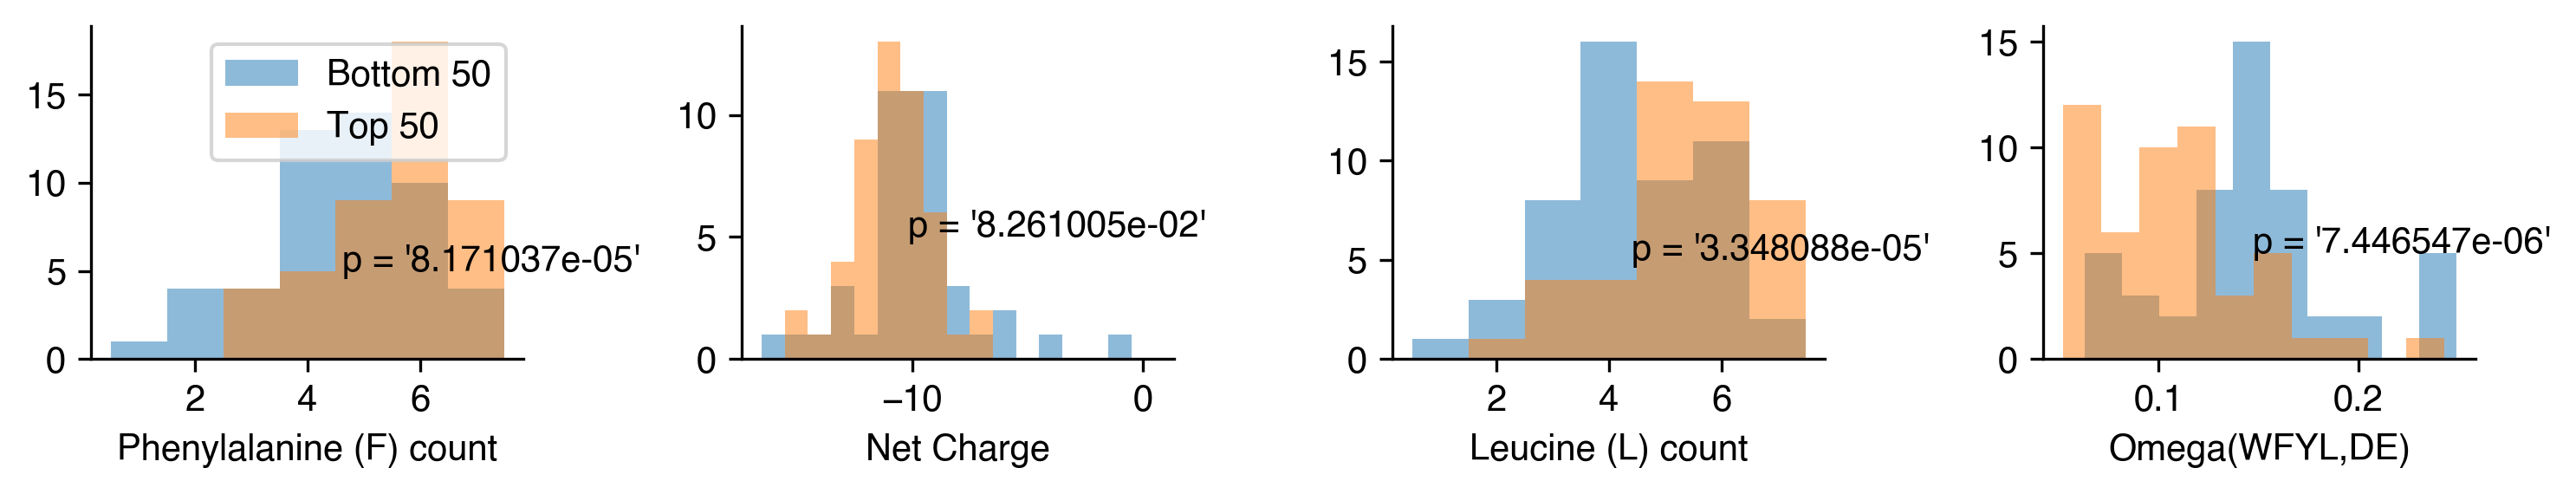

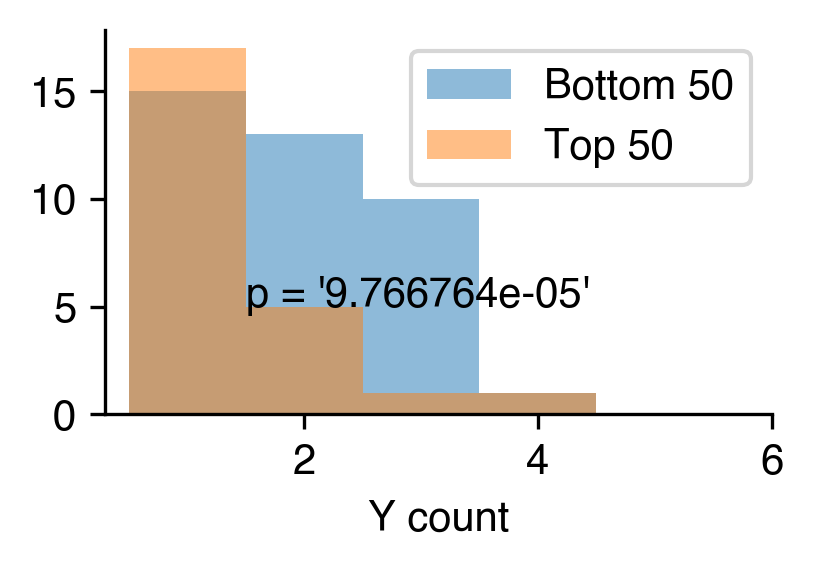

In [5]:
# count prolines in the VERY local region 
tempDF = FullOrthoDF
Upstream = 50
Downstream = 20
tempDF['substring2'] = tempDF.apply(lambda x: x['Seq'][max(x['WxxLF_loc']-Upstream,0):x['WxxLF_loc']+Downstream],1)
sortFeature ='IntegralAround_WxxLF'
tempDF= tempDF.drop_duplicates(subset=['substring2'],ignore_index=True)
tempDF = tempDF.sort_values(by = sortFeature,ascending=False,ignore_index=True)
top =tempDF.loc[0:49,:]
tempDF = tempDF.sort_values(by = sortFeature,ascending=True,ignore_index=True)
bot =tempDF.loc[0:49,:]
tempDF = bot
print(top.shape)
print(bot.shape)

print( 'Looking %i AA upstream and %i AA downtsream of the WxxLF motif, there are %i 15 AA regions' %(Upstream,Downstream,tempDF.shape[0]))
tempcount =[]
labeldict2 = {'P':'Proline count','F':'Phenylalanine (F) count','L':'Leucine (L) count','Y':'Y count','W':'W',
             'E':'E','D':'D','Charge':'Net Charge','OmegaWFYL_DE':"Omega(WFYL,DE)",'K':'K','R':'R','S':'S'}
def plotLocalCount(AA,printHist = False):
    Pcounter3, Pcounter4 = 0,0
    tempcount =[]
    for i, row in tempDF.iterrows():
        tempseq = row.substring2
        if AA =='Charge':
            tempCharge = tempseq.count('K')+tempseq.count('R')-tempseq.count('D')-tempseq.count('E')
            tempcount.append(tempCharge)
        elif AA =='OmegaWFYL_DE':
            seq =  SequenceParameters(tempseq)
            tempcount.append(seq.get_kappa_X(['D','E'],['W','F','Y','L']))
            
        else:
            tempcount.append(tempseq.count(AA))
    #         if tempseq.count(AA) >3:
    #             print((tempseq))
            if AA=='P': #count prolines
                if tempseq.count(AA) ==3:
                    Pcounter3+=1
                if tempseq.count(AA) ==4:
                    Pcounter4+=1
                
    print ('There are %i unique sequences. %i have 3 prolines and %i have 4 prolines' % ((tempDF.shape[0]),Pcounter3,Pcounter4))
        
    if AA=='Charge':
        plt.hist(tempcount,np.linspace(min(tempcount),0,np.abs(min(tempcount))+1)+.5,label ='Bottom 50',alpha=.5)        
    elif AA =='OmegaWFYL_DE':
        plt.hist(tempcount,10,label ='Bottom 50',alpha=.5)                
    else:
        plt.hist(tempcount,np.linspace(0,max(tempcount),max(tempcount)+1)+.5,label ='Bottom 50',alpha=.5)
    
    tempcount_top =[]
    for i, row in top.iterrows():
        tempseq = row.substring2
        if AA =='Charge':
            tempCharge = tempseq.count('K')+tempseq.count('R')-tempseq.count('D')-tempseq.count('E')
            tempcount_top.append(tempCharge)
        elif AA =='OmegaWFYL_DE':
            seq =  SequenceParameters(tempseq)
            tempcount_top.append(seq.get_kappa_X(['D','E'],['W','F','Y','L']))
        else:
            tempcount_top.append(tempseq.count(AA))
    if AA=='Charge':
        plt.hist(tempcount_top,np.linspace(min(tempcount),0,np.abs(min(tempcount))+1)+.5,label ='Top 50',alpha=.5)        
    elif AA =='OmegaWFYL_DE':
        plt.hist(tempcount_top,10,label ='Bottom 50',alpha=.5) 
    else:
        plt.hist(tempcount_top,np.linspace(0,max(tempcount),max(tempcount)+1)+.5,label ='Top 50',alpha=.5)
        plt.xticks([2,4,6])
    ##ttest
    test = stats.ttest_ind(tempcount,tempcount_top, equal_var=False)
    scientific_notation="{:e}".format(test[1])
    plt.text(np.mean(tempcount),5,'p = %r'%scientific_notation)


    plt.xlabel(labeldict2[AA])
    if printHist:
        x = plt.hist(tempcount,np.linspace(0,max(tempcount),max(tempcount)+1)+.5)
        print( x   )
plt.figure(figsize=(10,2)) 
plt.subplot(1,4,1)
plotLocalCount('F',printHist =False)
plt.legend()
plt.subplot(1,4,2)
plotLocalCount('Charge')
plt.subplot(1,4,3)
plotLocalCount('L')
plt.subplot(1,4,4)
plotLocalCount('OmegaWFYL_DE')

plt.tight_layout()
sns.despine()
# plt.savefig('Figures/PaperFigs/Revision/CAD_From_FullOrthologs_CountAAs.pdf')


plt.figure(figsize=(10,2)) 
plt.subplot(1,4,1)
plotLocalCount('Y',printHist =False)
plt.legend()
# plt.subplot(1,4,2)
# plotLocalCount('S')
# plt.subplot(1,4,3)
# plotLocalCount('P')
# plt.subplot(1,4,4)
# plotLocalCount('P')

plt.tight_layout()
sns.despine()


In [6]:
tempDF.columns

Index(['SpeciesName', 'Seq', 'Length', 'WxxLF_loc', 'SmoothedActivites',
       'LinearCharge', 'LinearHydrophobicityKD', 'SmoothedActivitesLoess',
       'Activity_at_WxxLF', 'CenteredXpos', 'Activity_at_WxxLF_plus20',
       'Activity_at_WxxLF_minus20', 'Activity_at_WxxLF_minus10',
       'IntegralAround_WxxLF', 'Activity_at_WxxLF_plus10', 'substring2'],
      dtype='object')

(50, 16)
(50, 16)
Looking 50 AA upstream and 20 AA downtsream of the WxxLF motif, there are 138 15 AA regions


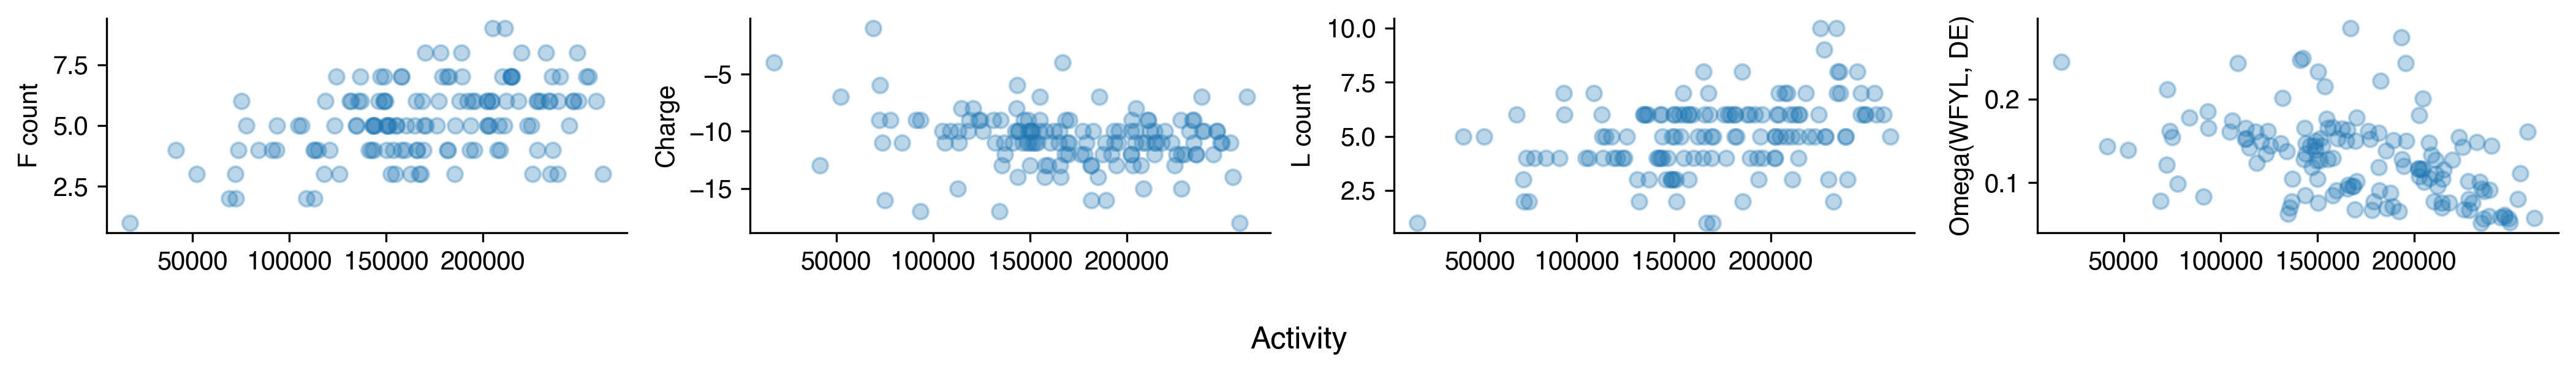

In [6]:
# count prolines in the VERY local region 
tempDF = FullOrthoDF
Upstream = 50
Downstream = 20
tempDF['substring2'] = tempDF.apply(lambda x: x['Seq'][max(x['WxxLF_loc']-Upstream,0):x['WxxLF_loc']+Downstream],1)
sortFeature ='IntegralAround_WxxLF'
tempDF= tempDF.drop_duplicates(subset=['substring2'],ignore_index=True)
tempDF = tempDF.sort_values(by = sortFeature,ascending=False,ignore_index=True)
top =tempDF.loc[0:49,:]
tempDF = tempDF.sort_values(by = sortFeature,ascending=True,ignore_index=True)
bot =tempDF.loc[0:49,:]
# tempDF = bot
print(top.shape)
print(bot.shape)

print( 'Looking %i AA upstream and %i AA downtsream of the WxxLF motif, there are %i 15 AA regions' %(Upstream,Downstream,tempDF.shape[0]))
tempcount =[]
labeldict2 = {'P':'Proline count','F':'Phenylalanine (F) count','L':'Leucine (L) count','Y':'Y count','W':'W',
             'E':'E','D':'D','Charge':'Net Charge','OmegaWFYL_DE':"Omega(WFYL,DE)",'K':'K','R':'R','S':'S'}

tempDF['charge'] = tempDF['substring2'].str.count('K') + tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')
tempDF['OmegaWFYL_DE'] = [SequenceParameters(seq).get_kappa_X(['D','E'],['W','F','Y','L']) for seq in tempDF['substring2']]
tempDF['F'] = tempDF['substring2'].str.count('F') #+ tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')
tempDF['L'] = tempDF['substring2'].str.count('L') #+ tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')

fig, axs = plt.subplots(1, 4, figsize=(14,2))

axs[0].scatter(tempDF['IntegralAround_WxxLF'], tempDF['F'], alpha=0.3)
axs[0].set_ylabel("F count")
axs[0].set_xticks([50000, 100000, 150000, 200000])

axs[1].scatter(tempDF['IntegralAround_WxxLF'], tempDF['charge'], alpha=0.3)
axs[1].set_ylabel("Charge")
axs[1].set_xticks([50000, 100000, 150000, 200000])

axs[2].scatter(tempDF['IntegralAround_WxxLF'], tempDF['L'], alpha=0.3)
axs[2].set_ylabel("L count")
axs[2].set_xticks([50000, 100000, 150000, 200000])

axs[3].scatter(tempDF['IntegralAround_WxxLF'], tempDF['OmegaWFYL_DE'], alpha=0.3)
axs[3].set_ylabel("Omega(WFYL, DE)")
axs[3].set_xticks([50000, 100000, 150000, 200000])
fig.supxlabel("Activity")

sns.despine()
plt.tight_layout()

In [8]:
from scipy.stats import linregress

(50, 16)
(50, 16)
Looking 50 AA upstream and 20 AA downtsream of the WxxLF motif, there are 138 15 AA regions


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


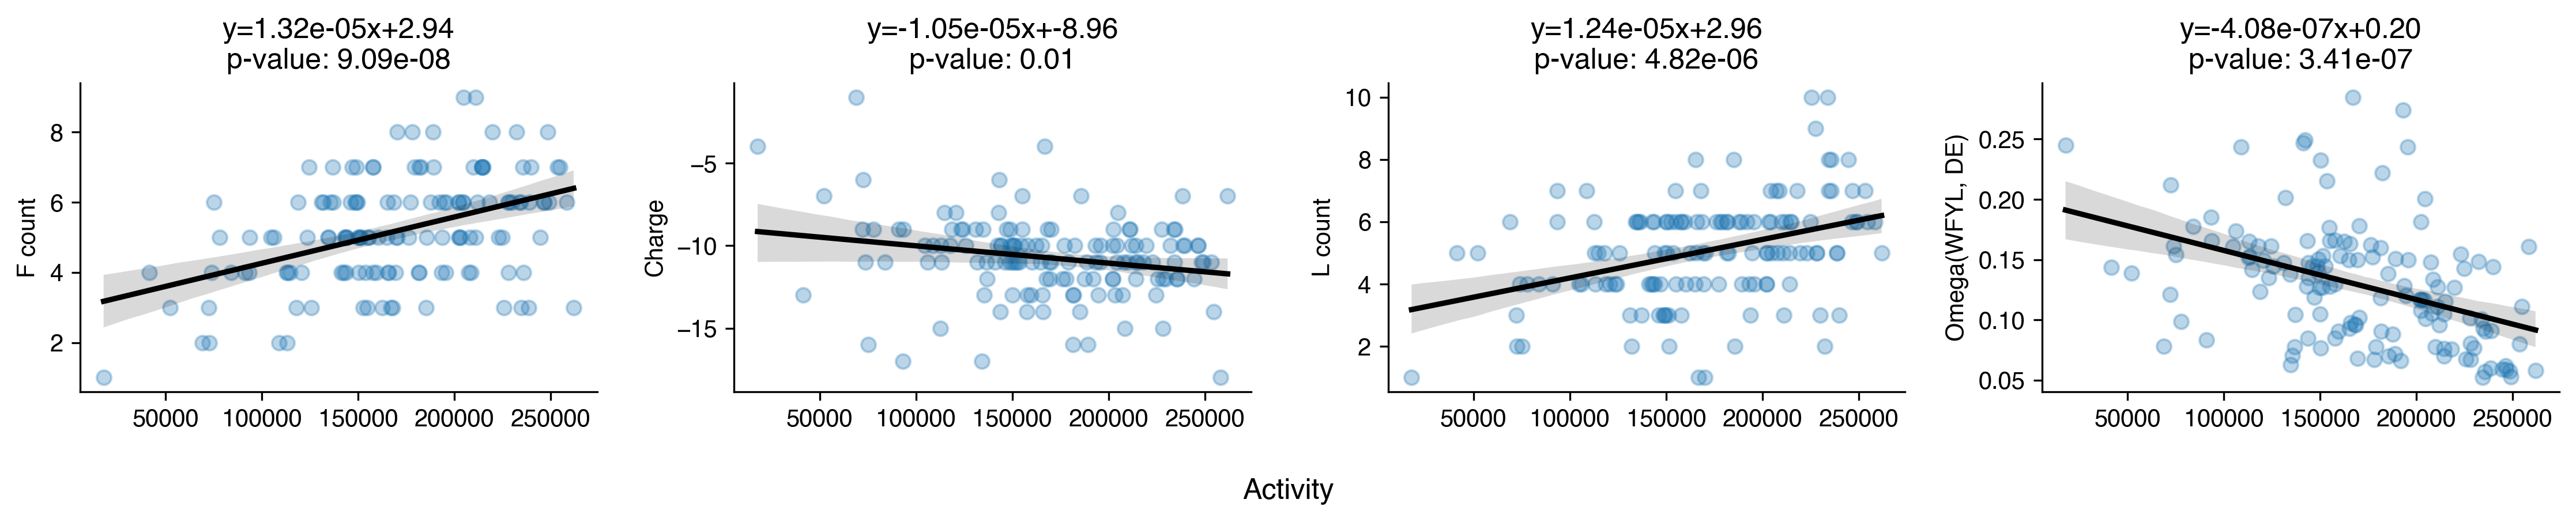

In [11]:
# count prolines in the VERY local region 
tempDF = FullOrthoDF
Upstream = 50
Downstream = 20
tempDF['substring2'] = tempDF.apply(lambda x: x['Seq'][max(x['WxxLF_loc']-Upstream,0):x['WxxLF_loc']+Downstream],1)
sortFeature ='IntegralAround_WxxLF'
tempDF= tempDF.drop_duplicates(subset=['substring2'],ignore_index=True)
tempDF = tempDF.sort_values(by = sortFeature,ascending=False,ignore_index=True)
top =tempDF.loc[0:49,:]
tempDF = tempDF.sort_values(by = sortFeature,ascending=True,ignore_index=True)
bot =tempDF.loc[0:49,:]
print(top.shape)
print(bot.shape)

print( 'Looking %i AA upstream and %i AA downtsream of the WxxLF motif, there are %i 15 AA regions' %(Upstream,Downstream,tempDF.shape[0]))
tempcount =[]
labeldict2 = {'P':'Proline count','F':'Phenylalanine (F) count','L':'Leucine (L) count','Y':'Y count','W':'W',
             'E':'E','D':'D','Charge':'Net Charge','OmegaWFYL_DE':"Omega(WFYL,DE)",'K':'K','R':'R','S':'S'}

tempDF['charge'] = tempDF['substring2'].str.count('K') + tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')
tempDF['OmegaWFYL_DE'] = [SequenceParameters(seq).get_kappa_X(['D','E'],['W','F','Y','L']) for seq in tempDF['substring2']]
tempDF['F'] = tempDF['substring2'].str.count('F') #+ tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')
tempDF['L'] = tempDF['substring2'].str.count('L') #+ tempDF['substring2'].str.count('R') - tempDF['substring2'].str.count('D') - tempDF['substring2'].str.count('E')

fig, axs = plt.subplots(1, 4, figsize=(15,3))

axs[0].scatter(tempDF['IntegralAround_WxxLF'], tempDF['F'], alpha=0.3)
slope, intercept, r_value, p_value, std_err = linregress(tempDF['IntegralAround_WxxLF'], tempDF['F'])

sns.regplot(x="IntegralAround_WxxLF",y="F",data=tempDF, fit_reg=True, ax=axs[0], scatter=False, color='black')
axs[0].set_ylabel("F count")
axs[0].set_xlabel("")
axs[0].set_xticks([50000, 100000, 150000, 200000, 250000])
axs[0].set_title(f"y={slope:.2e}x+{intercept:.2f}\np-value: {p_value:.2e}")

axs[1].scatter(tempDF['IntegralAround_WxxLF'], tempDF['charge'], alpha=0.3)
sns.regplot(x="IntegralAround_WxxLF",y="charge",data=tempDF, fit_reg=True, ax=axs[1], scatter=False, color='black')
axs[1].set_ylabel("Charge")
axs[1].set_xlabel("")
axs[1].set_xticks([50000, 100000, 150000, 200000, 250000])

slope, intercept, r_value, p_value, std_err = linregress(tempDF['IntegralAround_WxxLF'], tempDF['charge'])
axs[1].set_title(f"y={slope:.2e}x+{intercept:.2f}\np-value: {p_value:.3}")

axs[2].scatter(tempDF['IntegralAround_WxxLF'], tempDF['L'], alpha=0.3)
sns.regplot(x="IntegralAround_WxxLF",y="L",data=tempDF, fit_reg=True, ax=axs[2], scatter=False, color='black')
axs[2].set_ylabel("L count")
axs[2].set_xlabel("")
axs[2].set_xticks([50000, 100000, 150000, 200000, 250000])

slope, intercept, r_value, p_value, std_err = linregress(tempDF['IntegralAround_WxxLF'], tempDF['L'])
axs[2].set_title(f"y={slope:.2e}x+{intercept:.2f}\np-value: {p_value:.2e}")

axs[3].scatter(tempDF['IntegralAround_WxxLF'], tempDF['OmegaWFYL_DE'], alpha=0.3)
sns.regplot(x="IntegralAround_WxxLF",y="OmegaWFYL_DE",data=tempDF, fit_reg=True, ax=axs[3], scatter=False, color='black')
axs[3].set_ylabel("Omega(WFYL, DE)")
axs[3].set_xlabel("")
axs[3].set_xticks([50000, 100000, 150000, 200000, 250000])

slope, intercept, r_value, p_value, std_err = linregress(tempDF['IntegralAround_WxxLF'], tempDF['OmegaWFYL_DE'])
axs[3].set_title(f"y={slope:.2e}x+{intercept:.2f}\np-value: {p_value:.2e}")

fig.supxlabel("Activity")

sns.despine()
plt.tight_layout()

plt.savefig("../figures/CAD_property_scatters.pdf",format='pdf', bbox_inches='tight')

# Full ortho DF

In [18]:
FullOrthoDF

,SpeciesName,Seq,Length,WxxLF_loc,SmoothedActivites,LinearCharge,LinearHydrophobicityKD,SmoothedActivitesLoess
0,Sordariomycetes_jgi|Acral2|2019554|gm1.4974_g,MALRIEVYNRIESSTASTALQRQDLRYTFRSNARAASGQANANYQA...,2928,1006,"[50849.75653537431, 50849.75653537431, 50849.7...","[0.0, 0.0, 0.2, 0.0, 0.0, 0.0, -0.2, 0.0, 0.2,...","[0.0, 0.0, 0.6666666666666666, 0.5466666666666...","[34049.34344014826, 34049.34344014826, 34049.3..."
1,Sordariomycetes_jgi|Acral2|2027520|fgenesh1_pg...,MWLVVRAGPSPLLQDLAARCHIDGMSMPLLHFDPPDFPLTGVALGI...,455,327,"[50311.68363475637, 50311.68363475637, 50311.6...","[0.0, 0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, ...","[0.0, 0.0, 0.7933333333333333, 0.6511111111111...","[58366.833469168625, 58366.833469168625, 58366..."
2,Sordariomycetes_jgi|Acral2|2034848|fgenesh1_kg...,MSITELDDFTGFEGGASTAYSSPGAPAVFDLPGASNHVGTISPQDL...,222,94,"[64062.654182288825, 64062.654182288825, 75414...","[0.0, 0.0, -0.2, -0.2, -0.4, -0.6, -0.6, -0.4,...","[0.0, 0.0, 0.5311111111111111, 0.5733333333333...","[36846.26635132608, 36846.26635132608, 36846.2..."
3,Sordariomycetes_jgi|Acral2|2034849|fgenesh1_kg...,MSITGNYNQHFGAAGIISSHNYVLSELDDFTGFEGGASTAYSSPGA...,243,115,"[103421.45065118768, 103421.45065118768, 10342...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.6, 0.48, 0.4688888888888889, 0.29...","[98417.43715391349, 98417.43715391349, 98417.4..."
5,Sordariomycetes_jgi|Acral2|2047914|estExt_Gene...,MADTCGGSTPLKNFSQYGSQDRSLQQDRVVHGFHGSAAAGPSTFRS...,2943,1021,"[49761.33963354764, 49761.33963354764, 49761.3...","[0.0, 0.0, -0.2, -0.2, -0.2, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.5444444444444445, 0.4933333333333...","[36959.46539862907, 36959.46539862907, 36959.4..."
...,...,...,...,...,...,...,...,...
1207,Cimm_XP_012214147.1_CoccidioidesImmitisRS,MSTSNLPLDIGTLLDLSTDQFVEDLGSSSHSSLLDQDQLDQLINFN...,242,108,"[179044.502422884, 179044.502422884, 179044.50...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[215199.18805174268, 215199.18805174268, 21519..."
1208,Cpos_XP_003070205.1_CoccidioidesPosadasiiC735,MSTSNLPLGMVSLSASAVRLVANQRPDIGTLLDLSTDQYVEDLGSS...,260,126,"[56309.23879651313, 56309.23879651313, 56309.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.4133333333333334, 0.4555555555555...","[6138.0, 6138.0, 6138.0, 6138.0, 6138.0, 6138...."
1209,Mory_EHA48851.1_MagnaportheOryzae70_15,MNNTSDLGLDDFTAFGGGASAFPSPAMPGVFDIASTTASTMGTVSP...,239,101,"[165405.40017749005, 165405.40017749005, 16540...","[0.0, 0.0, 0.0, -0.2, -0.2, -0.2, -0.2, -0.4, ...","[0.0, 0.0, 0.3533333333333334, 0.2333333333333...","[156903.4915015713, 156903.4915015713, 156903...."
1210,Nfis_EAW24893.1_NeosartoryaFischeriNRRL181,MSTPNIAQDMPDFFGLPSNDFGDDFELSTEPTMLSPNQIPTGLMAV...,251,109,"[148604.20780984958, 148604.20780984958, 14860...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2, -0.2, -0....","[0.0, 0.0, 0.39555555555555555, 0.453333333333...","[177960.75802414527, 177960.75802414527, 17796..."


In [10]:
slope

np.float64(-4.076631800231946e-07)

In [24]:
tile_data = pd.read_csv('/Users/claireleblanc/Documents/grad_school/staller_lab/Evolution_stuff/gcn4_paper_stuff/data/OrthologTilingDFwActivities_20240930.csv')
tile_data.sort_values('Activity', ascending=False).drop_duplicates("SpeciesNames", keep='first')

,Unnamed: 0,SpeciesNames,NativeLocation,NormLocation,Seq,Activity,Stdev_BYS4_BioReps
7425,7425,Eurotiomycetes_jgi|Aspwest1|50292|CE50291_25256,121,-5,SPGYFSQDTSPMFATDMELAPGHEEWDSLFPTQDAFPALP,262143.000000,NaN
52526,52526,Saccharomycotina_jgi|Nadfu1|65686|estExt_Genem...,115,16,DMNNWESLFNEADPKTTTPILTSDSFVDSLVNSLDDGCFT,262143.000000,NaN
21522,21522,Dothideomycetes_jgi|Didsa1|335629|gw1.21.66.1,91,-16,TNITSPDIDQSPFITDSFEASPMFQGDSCFPTGTDTWYSL,262143.000000,NaN
33683,33683,Leotiomycetes_jgi|Hymvar1|378131|e_gw1.15.548.1,40,-94,YADMDLFDEFTAFEGGASTNNNNFNSAYSSPAVPTIYDPT,262143.000000,NaN
80510,80510,Pezizomycetes_jgi|Tubbor1|923263|gw1.637.7.1,44,-6,SLFDSPSESYDTSPLFNGDDVSSDGPWFSLFPETNPDPED,262143.000000,NaN
...,...,...,...,...,...,...,...
32029,32029,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,45,-39,LLDTRGSHLDDHNADQALRSNPGLTISPFEIHSSVIGSIF,147348.045597,NaN
34064,34064,Sordariomycetes_jgi|Hypfra2|223471|CE223470_11...,57,-48,GSDSVSNLSTVSPSDLFLQDHFTSAPNSSAITNLTSPSMY,145717.274234,NaN
34356,34356,Sordariomycetes_jgi|Hypfra2|485503|fgenesh1_kg...,57,-48,GSDSVSNLSTVSPSDLFLQDHFTSAPNSSAITNLTSPSMY,145717.274234,NaN
54730,54730,Leotiomycetes_jgi|Oidma1|18868|fgenesh1_kg.6_#...,20,11,MDHSLAGDPWYPLFPPEDQFEVPKIEDSSPLLPEEELEVS,142319.552379,21337.246744


In [40]:
tile_data[['CAD' in s for s in tile_data['SpeciesNames']]].sort_values('Activity', ascending=False).head()

,Unnamed: 0,SpeciesNames,NativeLocation,NormLocation,Seq,Activity,Stdev_BYS4_BioReps


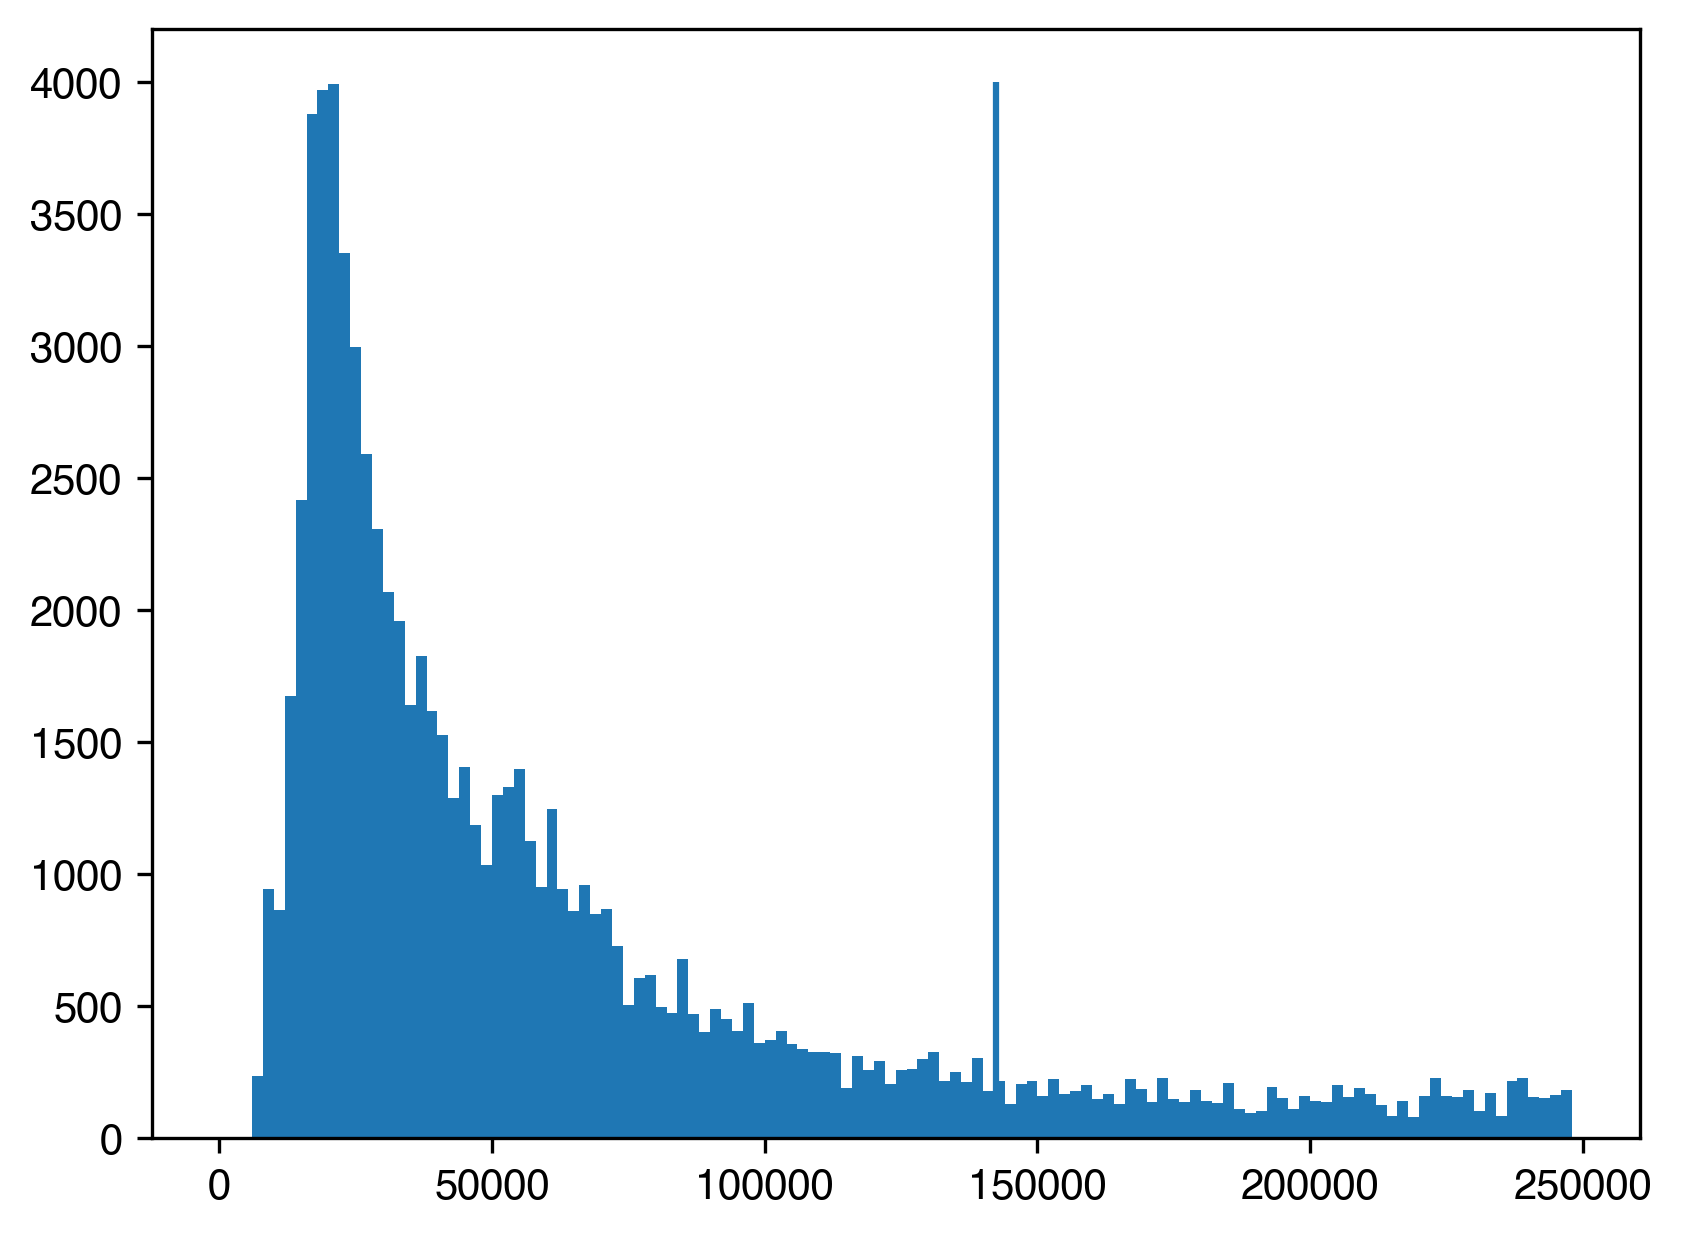

In [33]:
plt.hist(tile_data['Activity'], bins=np.arange(0, 250000, 2000))
plt.vlines(142319.552379, ymin=0, ymax=4000)
plt.show()

In [42]:
tile_data = pd.read_csv('../data/SC_Glucose_Ratio_MasterDF_20240930_withSeqFeatures.csv', index_col=0)

In [46]:
tile_data[tile_data.Name=='GCN4_CAAD40_0']['Activity_BYS4_BioRepAverage']

20682    137982.57013
Name: Activity_BYS4_BioRepAverage, dtype: float64

In [52]:
sum(tile_data['Activity_BYS4_BioRepAverage'] > 137982.57013) / len(tile_data['Activity_BYS4_BioRepAverage'])

0.07303072693068352